Importing Libraries

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler
import os

Data Reading into the environment

,Wind_speed,Power,Nacelle_ambient_temperature,Generator_bearing_temperature,Gear_oil_temperature,Ambient_temperature,Rotor_Speed,Nacelle_temperature,Bearing_temperature,Generator_speed,Yaw_angle,Wind_direction,Wheel_hub_temperature,Gear_box_inlet_temperature
count,3580.000000,3575.000000,3594.000000,3600.000000,3600.000000,3600.000000,3600.000000,3594.000000,3600.000000,3582.000000,3574.000000,3600.000000,3600.000000,3597.000000
mean,16.649779,3.366524,11.553371,84.910653,85.104356,17.258018,187.725740,45.181158,81.406848,1416.165751,49.990327,61.672044,20.114653,30.121688
std,13.316537,2.629256,43.946111,28.574645,23.237532,29.051354,122.926804,25.800055,30.660571,548.057852,56.374927,110.238694,57.782232,30.210642
min,-5.282205,0.001426,-263.018697,10.018170,50.000000,-20.000000,0.048201,-19.928440,10.020087,301.024856,0.014799,-416.325090,-89.889157,10.000000
25%,6.636192,2.247888,1.152290,73.325282,66.617971,-3.801116,95.775827,35.224818,70.000000,1143.711916,6.583051,10.701335,-19.526400,14.107718
50%,14.103255,2.731590,9.893326,83.938139,77.723856,9.955559,178.855084,45.312836,70.000000,1405.424602,18.363724,37.570098,20.421133,16.963881
75%,22.009360,3.274195,28.299636,95.912783,107.423215,29.618671,255.221624,55.788863,100.000000,1683.023815,94.487398,92.520724,60.715205,24.985291
max,54.422349,11.992076,293.004752,144.995476,129.984431,84.991308,449.616100,118.076163,149.949119,4003.655521,179.959470,636.424261,119.932205,119.965417


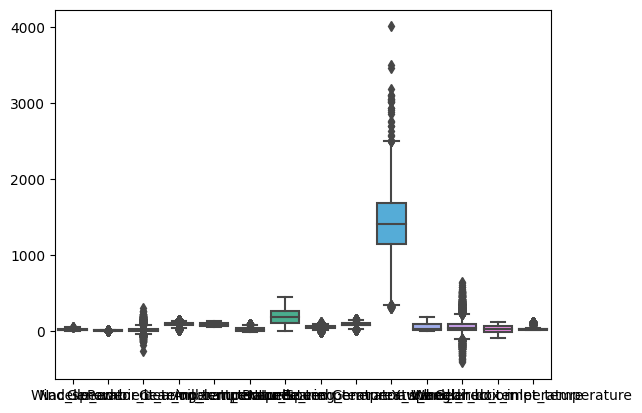

In [6]:
pd.set_option("display.max_columns", None)

data = pd.read_csv(r'/content/drive/MyDrive/unexpected_failure_of_wind_turbine.csv', encoding = 'latin-1')
data

data.head(5)
data.tail(5)

data.isna().sum()

data.dtypes

data.duplicated().sum()

sns.boxplot(data)

#making dataframe
df = pd.DataFrame(data)
df

#describing the data statistically
data.describe()

[0,100]

Plotting to check Outliers for Individual Coloumns

<Axes: >

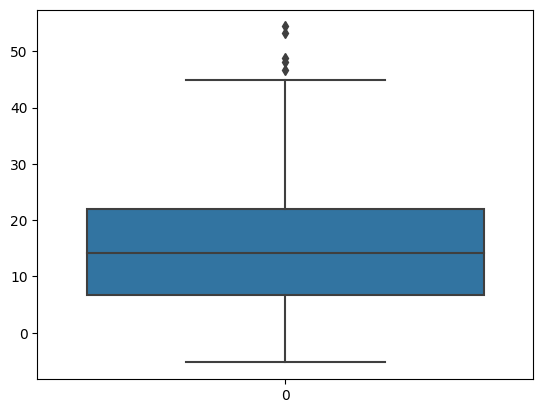

In [ ]:
#checking outliers
sns.boxplot(data.Wind_speed)

<Axes: >

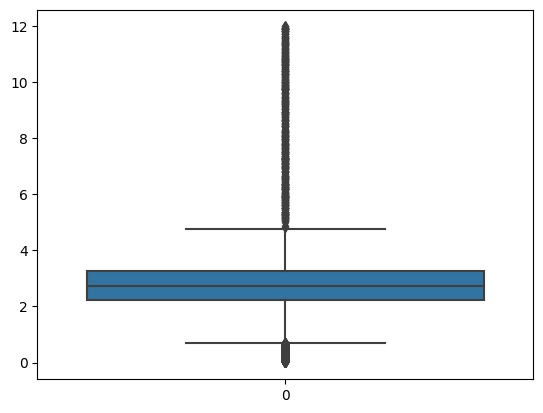

In [ ]:
sns.boxplot(data.Power)

<Axes: >

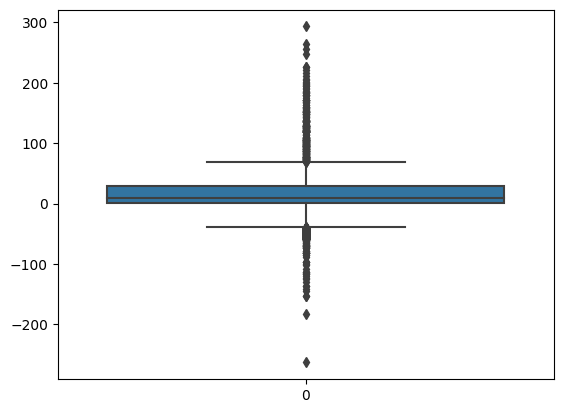

In [ ]:
sns.boxplot(data.Nacelle_ambient_temperature)

<Axes: >

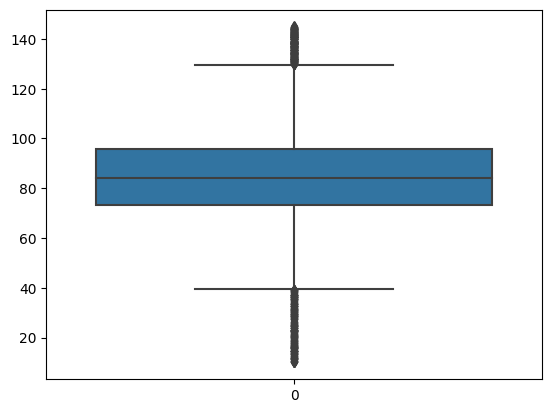

In [ ]:
sns.boxplot(data.Generator_bearing_temperature)

<Axes: >

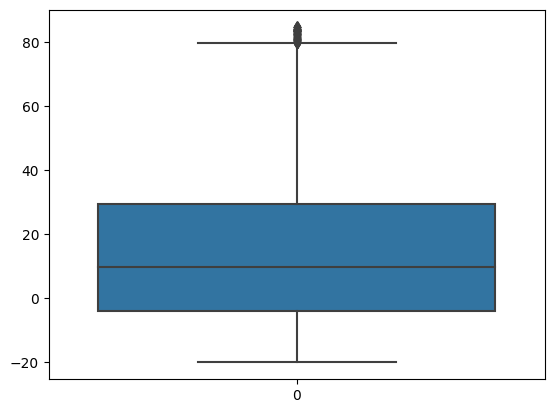

In [ ]:
sns.boxplot(data.Ambient_temperature)

<Axes: >

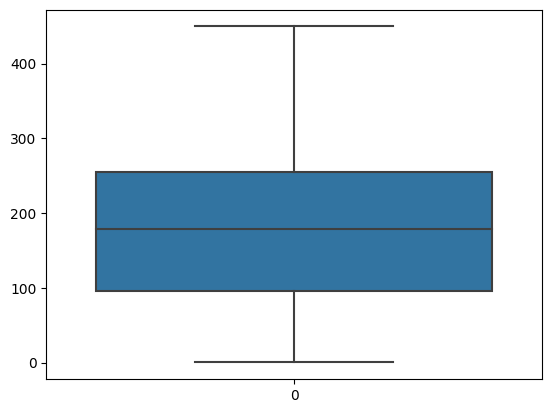

In [ ]:
sns.boxplot(data.Rotor_Speed)

<Axes: >

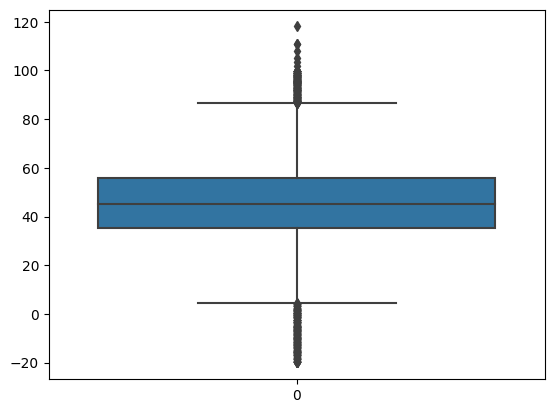

In [ ]:
sns.boxplot(data.Nacelle_temperature)

<Axes: >

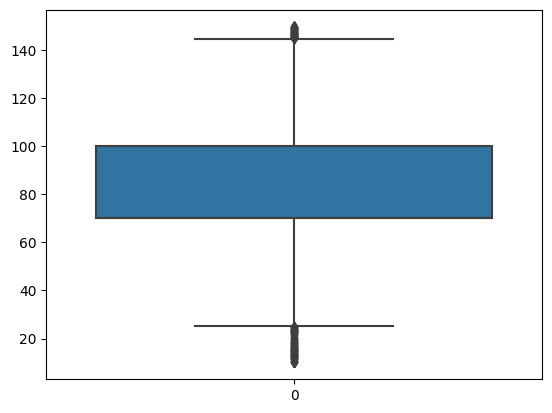

In [ ]:
sns.boxplot(data.Bearing_temperature)

<Axes: >

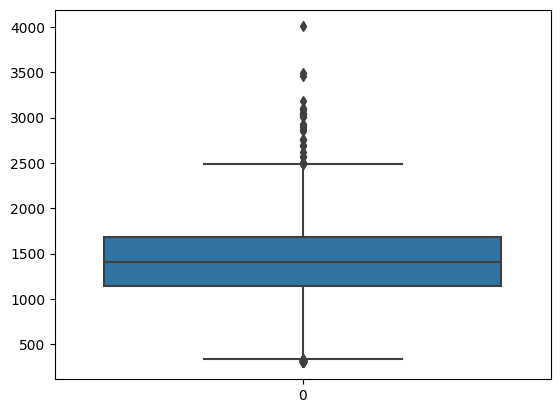

In [ ]:
sns.boxplot(data.Generator_speed)

<Axes: >

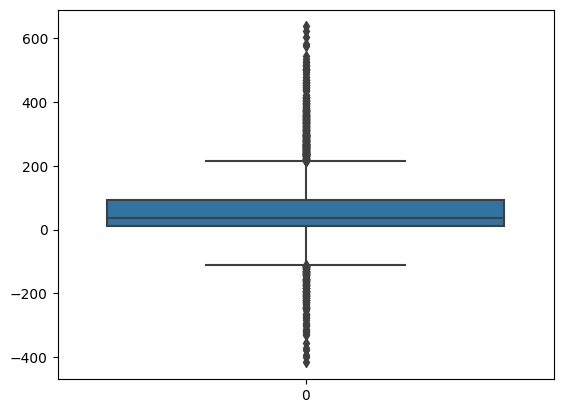

In [ ]:
sns.boxplot(data.Wind_direction)

<Axes: >

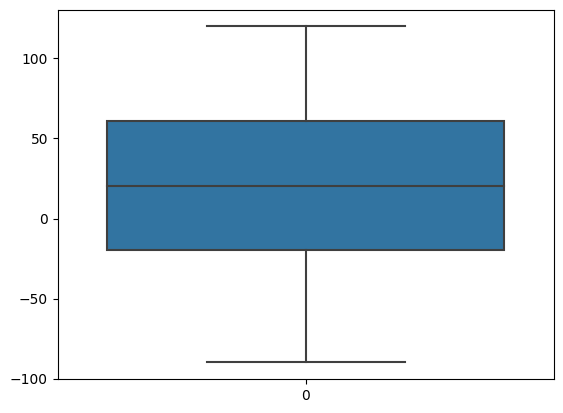

In [ ]:
sns.boxplot(data.Wheel_hub_temperature)

<Axes: >

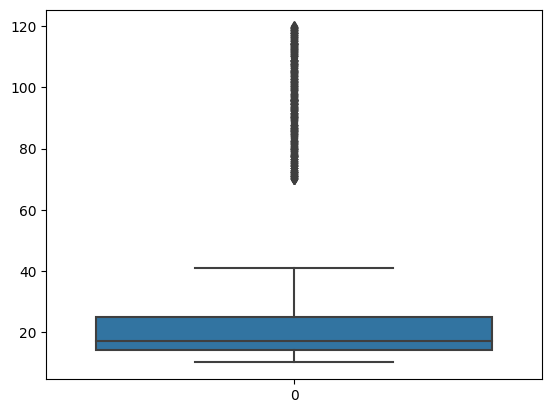

In [ ]:
sns.boxplot(data.Gear_box_inlet_temperature)

<Axes: >

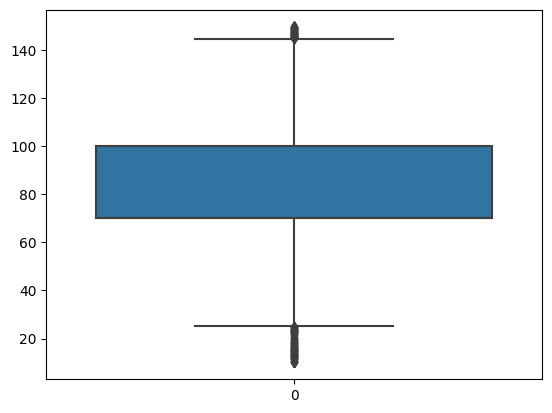

In [ ]:
sns.boxplot(data.Bearing_temperature)

IQR Treatment

In [ ]:
#Detecting outliers and solving them for each and every coloumn
#outliers for Wind_speed
IQR = data['Wind_speed'].quantile(0.75) - data['Wind_speed'].quantile(0.25)

lower_limit = data['Wind_speed'].quantile(0.25) - (IQR * 1.5)
upper_limit = data['Wind_speed'].quantile(0.75) + (IQR * 1.5)
outliers_data_windspeed = np.where(data.Wind_speed > upper_limit, True, np.where(data.Wind_speed < lower_limit, True, False))

#Trimmiing the outliers form the data
# outliers data for Wind_speed
data_out = data.loc[outliers_data_windspeed, ]
#Trimming/removing the outliers from the data
data_trimmed_windspeed = data.loc[~(outliers_data_windspeed), ]
data.shape, data_trimmed_windspeed.shape


((3600, 16), (3595, 16))

In [ ]:
#outliers for Power
IQR = data['Power'].quantile(0.75) - data['Power'].quantile(0.25)

lower_limit = data['Power'].quantile(0.25) - (IQR * 1.5)
upper_limit = data['Power'].quantile(0.75) + (IQR * 1.5)
outliers_data_power = np.where(data.Power > upper_limit, True, np.where(data.Power < lower_limit, True, False))

# outliers data for Power
data_out = data.loc[outliers_data_power, ]
#Trimming/removing the outliers from the data
data_trimmed_power = data.loc[~(outliers_data_power), ]
data.shape, data_trimmed_power.shape


((3600, 16), (2577, 16))

In [ ]:
#outliers for Nacelle_ambient_temperature
IQR = data['Nacelle_ambient_temperature'].quantile(0.75) - data['Nacelle_ambient_temperature'].quantile(0.25)

lower_limit = data['Nacelle_ambient_temperature'].quantile(0.25) - (IQR * 1.5)
upper_limit = data['Nacelle_ambient_temperature'].quantile(0.75) + (IQR * 1.5)
outliers_data_nacelle_ambient_temperature = np.where(data.Nacelle_ambient_temperature > upper_limit, True, np.where(data.Nacelle_ambient_temperature < lower_limit, True, False))

# outliers data for Nacalle_ambient_temperature
data_out = data.loc[outliers_data_nacelle_ambient_temperature, ]
#Trimming/removing the outliers from the data
data_trimmed_nacelle_ambient_temp = data.loc[~(outliers_data_nacelle_ambient_temperature), ]
data.shape, data_trimmed_nacelle_ambient_temp.shape

((3600, 16), (2880, 16))

In [ ]:
#outliers for Generator_bearing_temperature
IQR = data['Generator_bearing_temperature'].quantile(0.75) - data['Generator_bearing_temperature'].quantile(0.25)

lower_limit = data['Generator_bearing_temperature'].quantile(0.25) - (IQR * 1.5)
upper_limit = data['Generator_bearing_temperature'].quantile(0.75) + (IQR * 1.5)
outliers_data_generator_bearing_temperature = np.where(data.Generator_bearing_temperature > upper_limit, True, np.where(data.Generator_bearing_temperature < lower_limit, True, False))

# outliers data for Generator_bearing_temperature
data_out = data.loc[outliers_data_generator_bearing_temperature, ]
#Trimming/removing the outliers from the data
data_trimmed_generator_bearing_temp = data.loc[~(outliers_data_generator_bearing_temperature), ]
data.shape, data_trimmed_generator_bearing_temp.shape

((3600, 16), (2963, 16))

In [ ]:
#outliers for Gear_oil_temperature
IQR = data['Gear_oil_temperature'].quantile(0.75) - data['Gear_oil_temperature'].quantile(0.25)

lower_limit = data['Gear_oil_temperature'].quantile(0.25) - (IQR * 1.5)
upper_limit = data['Gear_oil_temperature'].quantile(0.75) + (IQR * 1.5)
outliers_data_gear_oil_temperature = np.where(data.Gear_oil_temperature > upper_limit, True, np.where(data.Gear_oil_temperature < lower_limit, True, False))

# outliers data for gear_oil_temperature
data_out = data.loc[outliers_data_gear_oil_temperature, ]
#Trimming/removing the outliers from the data
data_trimmed_gear_oil_temp = data.loc[~(outliers_data_gear_oil_temperature), ]
data.shape, data_trimmed_gear_oil_temp.shape

((3600, 16), (3600, 16))

In [ ]:
#outliers for Nacelle_temperature
IQR = data['Nacelle_temperature'].quantile(0.75) - data['Nacelle_temperature'].quantile(0.25)

lower_limit = data['Nacelle_temperature'].quantile(0.25) - (IQR * 1.5)
upper_limit = data['Nacelle_temperature'].quantile(0.75) + (IQR * 1.5)
outliers_data_nacelle_temperature = np.where(data.Nacelle_temperature > upper_limit, True, np.where(data.Nacelle_temperature < lower_limit, True, False))

# outliers data for Nacalle_temperature
data_out = data.loc[outliers_data_nacelle_temperature, ]
#Trimming/removing the outliers from the data
data_trimmed_nacelle_temp = data.loc[~(outliers_data_nacelle_temperature), ]
data.shape, data_trimmed_nacelle_temp.shape

((3600, 16), (2992, 16))

In [ ]:
#outliers for Bearing_temperature
IQR = data['Bearing_temperature'].quantile(0.75) - data['Bearing_temperature'].quantile(0.25)

lower_limit = data['Bearing_temperature'].quantile(0.25) - (IQR * 1.5)
upper_limit = data['Bearing_temperature'].quantile(0.75) + (IQR * 1.5)
outliers_data_bearing_temperature = np.where(data.Bearing_temperature > upper_limit, True, np.where(data.Bearing_temperature < lower_limit, True, False))

# outliers data for Bearing_temperature
data_out = data.loc[outliers_data_bearing_temperature, ]
#Trimming/removing the outliers from the data
data_trimmed_bearing_temp = data.loc[~(outliers_data_bearing_temperature), ]
data.shape, data_trimmed_bearing_temp.shape

((3600, 16), (3339, 16))

In [ ]:
#outliers for Generator_speed
IQR = data['Generator_speed'].quantile(0.75) - data['Generator_speed'].quantile(0.25)

lower_limit = data['Generator_speed'].quantile(0.25) - (IQR * 1.5)
upper_limit = data['Generator_speed'].quantile(0.75) + (IQR * 1.5)
outliers_data_generator_speed = np.where(data.Generator_speed > upper_limit, True, np.where(data.Generator_speed < lower_limit, True, False))

# outliers data for Generator_speed
data_out = data.loc[outliers_data_generator_speed, ]
#Trimming/removing the outliers from the data
data_trimmed_generator_speed = data.loc[~(outliers_data_generator_speed), ]
data.shape, data_trimmed_generator_speed.shape

((3600, 16), (3534, 16))

In [ ]:
#outliers for Yaw_angle
IQR = data['Yaw_angle'].quantile(0.75) - data['Yaw_angle'].quantile(0.25)

lower_limit = data['Yaw_angle'].quantile(0.25) - (IQR * 1.5)
upper_limit = data['Yaw_angle'].quantile(0.75) + (IQR * 1.5)
outliers_data_yaw_angle = np.where(data.Yaw_angle > upper_limit, True, np.where(data.Yaw_angle < lower_limit, True, False))

# outliers data for Yaw_angle
data_out = data.loc[outliers_data_yaw_angle, ]
#Trimming/removing the outliers from the data
data_trimmed_yaw_angle = data.loc[~(outliers_data_yaw_angle), ]
data.shape, data_trimmed_yaw_angle.shape

((3600, 16), (3600, 16))

In [ ]:
#outliers for Wind_direction
IQR = data['Wind_direction'].quantile(0.75) - data['Wind_direction'].quantile(0.25)

lower_limit = data['Wind_direction'].quantile(0.25) - (IQR * 1.5)
upper_limit = data['Wind_direction'].quantile(0.75) + (IQR * 1.5)
outliers_data_wind_direction = np.where(data.Wind_direction > upper_limit, True, np.where(data.Wind_direction < lower_limit, True, False))

# outliers data for Wind_direction
data_out = data.loc[outliers_data_wind_direction, ]
#Trimming/removing the outliers from the data
data_trimmed_wind_direction = data.loc[~(outliers_data_wind_direction), ]
data.shape, data_trimmed_wind_direction.shape

((3600, 16), (3156, 16))

In [ ]:
#outliers for Wheel_hub_temperature
IQR = data['Wheel_hub_temperature'].quantile(0.75) - data['Wheel_hub_temperature'].quantile(0.25)

lower_limit = data['Wheel_hub_temperature'].quantile(0.25) - (IQR * 1.5)
upper_limit = data['Wheel_hub_temperature'].quantile(0.75) + (IQR * 1.5)
outliers_data_wheel_hub_temperature = np.where(data.Wheel_hub_temperature > upper_limit, True, np.where(data.Wheel_hub_temperature < lower_limit, True, False))

# outliers data for Wheel_hub_temperature
data_out = data.loc[outliers_data_wheel_hub_temperature, ]
#Trimming/removing the outliers from the data
data_trimmed_wheel_hub_temp = data.loc[~(outliers_data_wheel_hub_temperature), ]
data.shape, data_trimmed_wheel_hub_temp.shape

((3600, 16), (3600, 16))

In [ ]:
#outliers for Gear_box_inlet_temperature
IQR = data['Gear_box_inlet_temperature'].quantile(0.75) - data['Gear_box_inlet_temperature'].quantile(0.25)

lower_limit = data['Gear_box_inlet_temperature'].quantile(0.25) - (IQR * 1.5)
upper_limit = data['Gear_box_inlet_temperature'].quantile(0.75) + (IQR * 1.5)
outliers_data_gear_box_inlet_temperature = np.where(data.Gear_box_inlet_temperature > upper_limit, True, np.where(data.Gear_box_inlet_temperature < lower_limit, True, False))

# outliers data for Nacalle_ambient_temperature
data_out = data.loc[outliers_data_gear_box_inlet_temperature, ]
#Trimming/removing the outliers from the data
data_trimmed_gear_box_inlet_temp = data.loc[~(outliers_data_gear_box_inlet_temperature), ]
data.shape, data_trimmed_gear_box_inlet_temp.shape

((3600, 29), (3000, 29))

In [ ]:
# Assuming data_trimmed_windspeed, data_trimmed_power, ... are the dataframes obtained after outlier removal

# Concatenating the dataframes along columns (axis=1) to combine them horizontally
outliers_rm_data = pd.concat([data_trimmed_windspeed, data_trimmed_power, data_trimmed_nacelle_ambient_temp,
                              data_trimmed_generator_bearing_temp, data_trimmed_gear_oil_temp,
                              data_trimmed_nacelle_temp, data_trimmed_bearing_temp,
                              data_trimmed_generator_speed, data_trimmed_yaw_angle,
                              data_trimmed_wind_direction, data_trimmed_wheel_hub_temp], axis=1)


In [ ]:
print(outliers_rm_data)

#checking out  the data
outliers_rm_data.head(5)
outliers_rm_data.tail(5)

            date  Wind_speed     Power  Nacelle_ambient_temperature  \
0     01-02-2021    7.878531  2.315370                    32.740165   
1     29-04-2021   43.880415  0.780599                   -55.994974   
2     27-07-2021   14.215257  2.089855                    40.000000   
3     05-06-2021   41.578706  0.149758                   -54.050003   
4     26-05-2021   19.067139  2.973043                    12.731400   
...          ...         ...       ...                          ...   
2614         NaN         NaN       NaN                          NaN   
2666         NaN         NaN       NaN                          NaN   
3203         NaN         NaN       NaN                          NaN   
2923         NaN         NaN       NaN                          NaN   
3574         NaN         NaN       NaN                          NaN   

      Generator_bearing_temperature  Gear_oil_temperature  \
0                         86.452399             65.049688   
1                        

,date,Wind_speed,Power,Nacelle_ambient_temperature,Generator_bearing_temperature,Gear_oil_temperature,Ambient_temperature,Rotor_Speed,Nacelle_temperature,Bearing_temperature,Generator_speed,Yaw_angle,Wind_direction,Wheel_hub_temperature,Gear_box_inlet_temperature,Failure_status,date,Wind_speed,Power,Nacelle_ambient_temperature,Generator_bearing_temperature,Gear_oil_temperature,Ambient_temperature,Rotor_Speed,Nacelle_temperature,Bearing_temperature,Generator_speed,Yaw_angle,Wind_direction,Wheel_hub_temperature,Gear_box_inlet_temperature,Failure_status,date,Wind_speed,Power,Nacelle_ambient_temperature,Generator_bearing_temperature,Gear_oil_temperature,Ambient_temperature,Rotor_Speed,Nacelle_temperature,Bearing_temperature,Generator_speed,Yaw_angle,Wind_direction,Wheel_hub_temperature,Gear_box_inlet_temperature,Failure_status,date,Wind_speed,Power,Nacelle_ambient_temperature,Generator_bearing_temperature,Gear_oil_temperature,Ambient_temperature,Rotor_Speed,Nacelle_temperature,Bearing_temperature,Generator_speed,Yaw_angle,Wind_direction,Wheel_hub_temperature,Gear_box_inlet_temperature,Failure_status,date,Wind_speed,Power,Nacelle_ambient_temperature,Generator_bearing_temperature,Gear_oil_temperature,Ambient_temperature,Rotor_Speed,Nacelle_temperature,Bearing_temperature,Generator_speed,Yaw_angle,Wind_direction,Wheel_hub_temperature,Gear_box_inlet_temperature,Failure_status,date,Wind_speed,Power,Nacelle_ambient_temperature,Generator_bearing_temperature,Gear_oil_temperature,Ambient_temperature,Rotor_Speed,Nacelle_temperature,Bearing_temperature,Generator_speed,Yaw_angle,Wind_direction,Wheel_hub_temperature,Gear_box_inlet_temperature,Failure_status,date,Wind_speed,Power,Nacelle_ambient_temperature,Generator_bearing_temperature,Gear_oil_temperature,Ambient_temperature,Rotor_Speed,Nacelle_temperature,Bearing_temperature,Generator_speed,Yaw_angle,Wind_direction,Wheel_hub_temperature,Gear_box_inlet_temperature,Failure_status,date,Wind_speed,Power,Nacelle_ambient_temperature,Generator_bearing_temperature,Gear_oil_temperature,Ambient_temperature,Rotor_Speed,Nacelle_temperature,Bearing_temperature,Generator_speed,Yaw_angle,Wind_direction,Wheel_hub_temperature,Gear_box_inlet_temperature,Failure_status,date,Wind_speed,Power,Nacelle_ambient_temperature,Generator_bearing_temperature,Gear_oil_temperature,Ambient_temperature,Rotor_Speed,Nacelle_temperature,Bearing_temperature,Generator_speed,Yaw_angle,Wind_direction,Wheel_hub_temperature,Gear_box_inlet_temperature,Failure_status,date,Wind_speed,Power,Nacelle_ambient_temperature,Generator_bearing_temperature,Gear_oil_temperature,Ambient_temperature,Rotor_Speed,Nacelle_temperature,Bearing_temperature,Generator_speed,Yaw_angle,Wind_direction,Wheel_hub_temperature,Gear_box_inlet_temperature,Failure_status,date,Wind_speed,Power,Nacelle_ambient_temperature,Generator_bearing_temperature,Gear_oil_temperature,Ambient_temperature,Rotor_Speed,Nacelle_temperature,Bearing_temperature,Generator_speed,Yaw_angle,Wind_direction,Wheel_hub_temperature,Gear_box_inlet_temperature,Failure_status
2614,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29-12-2021,53.261641,4.588143,59.125890,98.317078,62.101660,9.920307,50.000000,62.906623,100.0,3014.839715,9.761653,23.883795,22.110702,11.931607,No_failure,29-12-2021,53.261641,4.588143,59.125890,98.317078,62.101660,9.920307,50.000000,62.906623,100.0,3014.839715,9.761653,23.883795,22.110702,11.931607,No_failure,29-12-2021,53.261641,4.588143,59.125890,98.317078,62.101660,9.920307,50.000000,62.906623,100.0,3014.839715,9.761653,23.883795,22.110702,11.931607,No_failure,29-12-2021,53.261641,4.588143,59.125890,98.317078,62.101660,9.920307,50.000000,62.906623,100.0,3014.839715,9.761653,23.883795,22.110702,11.931607,No_failure,29-12-2021,53.261641,4.588143,59.125890,98.317078,62.101660,9.920307,50.000000,62.906623,100.0,3014.839715,9.761653,23.883795,22.110702,11.931607,No_failure,29-12-2021,53.261641,4.588143,59.125890,98.317078,62.101660,9.920307,50.000000,62.90662

Checking out the data after removing outliers

In [ ]:
#checking out  the data
outliers_rm_data.head(5)

,date,Wind_speed,Power,Nacelle_ambient_temperature,Generator_bearing_temperature,Gear_oil_temperature,Ambient_temperature,Rotor_Speed,Nacelle_temperature,Bearing_temperature,Generator_speed,Yaw_angle,Wind_direction,Wheel_hub_temperature,Gear_box_inlet_temperature,Failure_status,date,Wind_speed,Power,Nacelle_ambient_temperature,Generator_bearing_temperature,Gear_oil_temperature,Ambient_temperature,Rotor_Speed,Nacelle_temperature,Bearing_temperature,Generator_speed,Yaw_angle,Wind_direction,Wheel_hub_temperature,Gear_box_inlet_temperature,Failure_status,date,Wind_speed,Power,Nacelle_ambient_temperature,Generator_bearing_temperature,Gear_oil_temperature,Ambient_temperature,Rotor_Speed,Nacelle_temperature,Bearing_temperature,Generator_speed,Yaw_angle,Wind_direction,Wheel_hub_temperature,Gear_box_inlet_temperature,Failure_status,date,Wind_speed,Power,Nacelle_ambient_temperature,Generator_bearing_temperature,Gear_oil_temperature,Ambient_temperature,Rotor_Speed,Nacelle_temperature,Bearing_temperature,Generator_speed,Yaw_angle,Wind_direction,Wheel_hub_temperature,Gear_box_inlet_temperature,Failure_status,date,Wind_speed,Power,Nacelle_ambient_temperature,Generator_bearing_temperature,Gear_oil_temperature,Ambient_temperature,Rotor_Speed,Nacelle_temperature,Bearing_temperature,Generator_speed,Yaw_angle,Wind_direction,Wheel_hub_temperature,Gear_box_inlet_temperature,Failure_status,date,Wind_speed,Power,Nacelle_ambient_temperature,Generator_bearing_temperature,Gear_oil_temperature,Ambient_temperature,Rotor_Speed,Nacelle_temperature,Bearing_temperature,Generator_speed,Yaw_angle,Wind_direction,Wheel_hub_temperature,Gear_box_inlet_temperature,Failure_status,date,Wind_speed,Power,Nacelle_ambient_temperature,Generator_bearing_temperature,Gear_oil_temperature,Ambient_temperature,Rotor_Speed,Nacelle_temperature,Bearing_temperature,Generator_speed,Yaw_angle,Wind_direction,Wheel_hub_temperature,Gear_box_inlet_temperature,Failure_status,date,Wind_speed,Power,Nacelle_ambient_temperature,Generator_bearing_temperature,Gear_oil_temperature,Ambient_temperature,Rotor_Speed,Nacelle_temperature,Bearing_temperature,Generator_speed,Yaw_angle,Wind_direction,Wheel_hub_temperature,Gear_box_inlet_temperature,Failure_status,date,Wind_speed,Power,Nacelle_ambient_temperature,Generator_bearing_temperature,Gear_oil_temperature,Ambient_temperature,Rotor_Speed,Nacelle_temperature,Bearing_temperature,Generator_speed,Yaw_angle,Wind_direction,Wheel_hub_temperature,Gear_box_inlet_temperature,Failure_status,date,Wind_speed,Power,Nacelle_ambient_temperature,Generator_bearing_temperature,Gear_oil_temperature,Ambient_temperature,Rotor_Speed,Nacelle_temperature,Bearing_temperature,Generator_speed,Yaw_angle,Wind_direction,Wheel_hub_temperature,Gear_box_inlet_temperature,Failure_status,date,Wind_speed,Power,Nacelle_ambient_temperature,Generator_bearing_temperature,Gear_oil_temperature,Ambient_temperature,Rotor_Speed,Nacelle_temperature,Bearing_temperature,Generator_speed,Yaw_angle,Wind_direction,Wheel_hub_temperature,Gear_box_inlet_temperature,Failure_status
0,01-02-2021,7.878531,2.315370,32.740165,86.452399,65.049688,33.680184,134.147513,56.460579,100.000000,1456.017383,14.437189,7.276999,12.738843,17.584294,No_failure,01-02-2021,7.878531,2.315370,32.740165,86.452399,65.049688,33.680184,134.147513,56.460579,100.000000,1456.017383,14.437189,7.276999,12.738843,17.584294,No_failure,01-02-2021,7.878531,2.315370,32.740165,86.452399,65.049688,33.680184,134.147513,56.460579,100.000000,1456.017383,14.437189,7.276999,12.738843,17.584294,No_failure,01-02-2021,7.878531,2.315370,32.740165,86.452399,65.049688,33.680184,134.147513,56.460579,100.000000,1456.017383,14.437189,7.276999,12.738843,17.584294,No_failure,01-02-2021,7.878531,2.315370,32.740165,86.452399,65.049688,33.680184,134.147513,56.460579,100.000000,1456.017383,14.437189,7.276999,12.738843,17.584294,No_failure,01-02-2021,7.878531,2.315370,32.740165,86.452399,65.049688,33.680184,134.147513,56.460579,100.000000,1456.017383,14.437189,7

In [ ]:
outliers_rm_data.tail(5)

,date,Wind_speed,Power,Nacelle_ambient_temperature,Generator_bearing_temperature,Gear_oil_temperature,Ambient_temperature,Rotor_Speed,Nacelle_temperature,Bearing_temperature,Generator_speed,Yaw_angle,Wind_direction,Wheel_hub_temperature,Gear_box_inlet_temperature,Failure_status,date,Wind_speed,Power,Nacelle_ambient_temperature,Generator_bearing_temperature,Gear_oil_temperature,Ambient_temperature,Rotor_Speed,Nacelle_temperature,Bearing_temperature,Generator_speed,Yaw_angle,Wind_direction,Wheel_hub_temperature,Gear_box_inlet_temperature,Failure_status,date,Wind_speed,Power,Nacelle_ambient_temperature,Generator_bearing_temperature,Gear_oil_temperature,Ambient_temperature,Rotor_Speed,Nacelle_temperature,Bearing_temperature,Generator_speed,Yaw_angle,Wind_direction,Wheel_hub_temperature,Gear_box_inlet_temperature,Failure_status,date,Wind_speed,Power,Nacelle_ambient_temperature,Generator_bearing_temperature,Gear_oil_temperature,Ambient_temperature,Rotor_Speed,Nacelle_temperature,Bearing_temperature,Generator_speed,Yaw_angle,Wind_direction,Wheel_hub_temperature,Gear_box_inlet_temperature,Failure_status,date,Wind_speed,Power,Nacelle_ambient_temperature,Generator_bearing_temperature,Gear_oil_temperature,Ambient_temperature,Rotor_Speed,Nacelle_temperature,Bearing_temperature,Generator_speed,Yaw_angle,Wind_direction,Wheel_hub_temperature,Gear_box_inlet_temperature,Failure_status,date,Wind_speed,Power,Nacelle_ambient_temperature,Generator_bearing_temperature,Gear_oil_temperature,Ambient_temperature,Rotor_Speed,Nacelle_temperature,Bearing_temperature,Generator_speed,Yaw_angle,Wind_direction,Wheel_hub_temperature,Gear_box_inlet_temperature,Failure_status,date,Wind_speed,Power,Nacelle_ambient_temperature,Generator_bearing_temperature,Gear_oil_temperature,Ambient_temperature,Rotor_Speed,Nacelle_temperature,Bearing_temperature,Generator_speed,Yaw_angle,Wind_direction,Wheel_hub_temperature,Gear_box_inlet_temperature,Failure_status,date,Wind_speed,Power,Nacelle_ambient_temperature,Generator_bearing_temperature,Gear_oil_temperature,Ambient_temperature,Rotor_Speed,Nacelle_temperature,Bearing_temperature,Generator_speed,Yaw_angle,Wind_direction,Wheel_hub_temperature,Gear_box_inlet_temperature,Failure_status,date,Wind_speed,Power,Nacelle_ambient_temperature,Generator_bearing_temperature,Gear_oil_temperature,Ambient_temperature,Rotor_Speed,Nacelle_temperature,Bearing_temperature,Generator_speed,Yaw_angle,Wind_direction,Wheel_hub_temperature,Gear_box_inlet_temperature,Failure_status,date,Wind_speed,Power,Nacelle_ambient_temperature,Generator_bearing_temperature,Gear_oil_temperature,Ambient_temperature,Rotor_Speed,Nacelle_temperature,Bearing_temperature,Generator_speed,Yaw_angle,Wind_direction,Wheel_hub_temperature,Gear_box_inlet_temperature,Failure_status,date,Wind_speed,Power,Nacelle_ambient_temperature,Generator_bearing_temperature,Gear_oil_temperature,Ambient_temperature,Rotor_Speed,Nacelle_temperature,Bearing_temperature,Generator_speed,Yaw_angle,Wind_direction,Wheel_hub_temperature,Gear_box_inlet_temperature,Failure_status
2614,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29-12-2021,53.261641,4.588143,59.125890,98.317078,62.101660,9.920307,50.000000,62.906623,100.0,3014.839715,9.761653,23.883795,22.110702,11.931607,No_failure,29-12-2021,53.261641,4.588143,59.125890,98.317078,62.101660,9.920307,50.000000,62.906623,100.0,3014.839715,9.761653,23.883795,22.110702,11.931607,No_failure,29-12-2021,53.261641,4.588143,59.125890,98.317078,62.101660,9.920307,50.000000,62.906623,100.0,3014.839715,9.761653,23.883795,22.110702,11.931607,No_failure,29-12-2021,53.261641,4.588143,59.125890,98.317078,62.101660,9.920307,50.000000,62.906623,100.0,3014.839715,9.761653,23.883795,22.110702,11.931607,No_failure,29-12-2021,53.261641,4.588143,59.125890,98.317078,62.101660,9.920307,50.000000,62.906623,100.0,3014.839715,9.761653,23.883795,22.110702,11.931607,No_failure,29-12-2021,53.261641,4.588143,59.125890,98.317078,62.101660,9.920307,50.000000,62.90662

Imputation Techniques and Winsorization


In [ ]:
# Columns with numeric values
numeric_columns = ['Wind_speed', 'Power', 'Nacelle_ambient_temperature', 'Generator_bearing_temperature', 'Gear_oil_temperature', 'Nacelle_temperature', 'Bearing_temperature', 'Generator_speed', 'Yaw_angle', 'Wind_direction', 'Wheel_hub_temperature', 'Gear_box_inlet_temperature']

# Handling missing values(filling NaNs with mean value)
imputer = SimpleImputer(strategy='mean')
data[numeric_columns] = imputer.fit_transform(data[numeric_columns])

# Winsorization technique
for col in numeric_columns:
    winsorizer = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=[col])
    data[col+'_winsorized'] = winsorizer.fit_transform(data[[col]])

# after winsorizing outliers
data.shape

(3600, 29)

Label Encoding

In [ ]:
# Creating a LabelEncoder to transform failure status coloumn
label_encoder = LabelEncoder()

# Fit and transform the 'Failure_status' column
data['Failure_status_encoded'] = label_encoder.fit_transform(data['Failure_status'])

# Displaying the encoded values
print(data[['Failure_status', 'Failure_status_encoded']].head(5))

  Failure_status  Failure_status_encoded
0     No_failure                       1
1        Failure                       0
2     No_failure                       1
3        Failure                       0
4     No_failure                       1


In [ ]:
# Checking missing values after replacement
print(data.isna().sum())

date                                        0
Wind_speed                                  0
Power                                       0
Nacelle_ambient_temperature                 0
Generator_bearing_temperature               0
Gear_oil_temperature                        0
Ambient_temperature                         0
Rotor_Speed                                 0
Nacelle_temperature                         0
Bearing_temperature                         0
Generator_speed                             0
Yaw_angle                                   0
Wind_direction                              0
Wheel_hub_temperature                       0
Gear_box_inlet_temperature                  0
Failure_status                              0
Wind_speed_winsorized                       0
Power_winsorized                            0
Nacelle_ambient_temperature_winsorized      0
Generator_bearing_temperature_winsorized    0
Gear_oil_temperature_winsorized             0
Nacelle_temperature_winsorized    

MINMAX Scaling

In [ ]:
# Applying MinMax Scaling
# Identify non-numeric columns and exclude them before scaling
non_numeric_columns = data.select_dtypes(exclude=['float', 'int']).columns.tolist()
data_numeric = data.drop(columns=non_numeric_columns)

# MinMax Scaling on numeric data only
minmax_scaler = MinMaxScaler()
data_minmax_scaled = minmax_scaler.fit_transform(data_numeric)
data_minmax_scaled = pd.DataFrame(data_minmax_scaled, columns=data_numeric.columns)
data_minmax_scaled.to_csv('minmax_scaled_data.csv', index=False)  # Save MinMax scaled data to CSV

Standard Scaling

In [ ]:
# Applying Standard Scaling
# Identify non-numeric columns and exclude them before scaling
non_numeric_columns = data.select_dtypes(exclude=['float', 'int']).columns.tolist()
data_numeric = data.drop(columns=non_numeric_columns)

# Standard Scaling on numeric data only
standard_scaler = StandardScaler()
data_standard_scaled = standard_scaler.fit_transform(data_numeric)
data_standard_scaled = pd.DataFrame(data_standard_scaled, columns=data_numeric.columns)
data_standard_scaled.to_csv('standard_scaled_data.csv', index=False)  # Save Standard scaled data to CSV

Robust Scaling

In [ ]:
# Applying Robust Scaling
# Identify non-numeric columns and exclude them before scaling
non_numeric_columns = data.select_dtypes(exclude=['float', 'int']).columns.tolist()
data_numeric = data.drop(columns=non_numeric_columns)

# Robust Scaling on numeric data only
robust_scaler = RobustScaler()
data_robust_scaled = robust_scaler.fit_transform(data_numeric)
data_robust_scaled = pd.DataFrame(data_robust_scaled, columns=data_numeric.columns)
data_robust_scaled.to_csv('robust_scaled_data.csv', index=False)  # Save Robust scaled data to CSV

In [ ]:
os.getcwd()

'/content/D:/Project(Wind turbine)/Datasets/Scaling'

In [ ]:
# Desired folder path to save the files
desired_folder_path = 'D:/Project(Wind turbine)/Datasets/Scaling'

# Create the directory if it doesn't exist
if not os.path.exists(desired_folder_path):
    os.makedirs(desired_folder_path)

# Change working directory to the desired folder path
os.chdir(desired_folder_path)

AUTO EDA

In [ ]:
# Load the Data
import pandas as pd

df = pd.read_csv(r"D:/Data/education.csv")


import sweetviz as sv

s = sv.analyze(df)
s.show_html()

from autoviz.AutoViz_Class import AutoViz_Class

av = AutoViz_Class()
a = av.AutoViz(r"D:/Data/education.csv", chart_format = 'html')

import os
os.getcwd()

a = av.AutoViz(r"C:/Data/education.csv")

import dtale
import pandas as pd

df = pd.read_csv(r"D:/Data/education.csv")

d = dtale.show(df)
d.open_browser()

from pandas_profiling import ProfileReport

p = ProfileReport(df)
p
p.to_file("output.html")

import os
os.getcwd()
# pip install dataprep
from dataprep.eda import create_report

report = create_report(df, title = 'My Report')

report.show_browser()


